In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [120]:
def load_data(file_path):

    X = []
    y = []
    with open(file_path, 'r') as f:
        for line in f:
            tokens = line.strip().split()
            label = int(tokens[0])
            y.append(label)
            features = {}
            for item in tokens[1:]:
                index, value = item.split(':')
                features[int(index) - 1] = float(value)  # 索引从0开始
            feature_vector = [features.get(i, 0.0) for i in range(8)] 
            X.append(feature_vector)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [121]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    results = {
        'Training Accuracy': accuracy_train,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    return results, y_pred

In [122]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (-1)', 'Positive (+1)'], yticklabels=['Negative (-1)', 'Positive (+1)'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

In [123]:
def optimize_perceptron(X_train, y_train):

    param_grid = {
        'penalty': [None, 'l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'max_iter': [1000, 2000, 3000],
        'eta0': [0.0001, 0.001, 0.01, 0.1]
    }

    perceptron = Perceptron(random_state=42)

    grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, 
                               cv=5, scoring='f1', n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)

    print("Best Perceptron Parameters:", grid_search.best_params_)
    print("Best F1 Score:", grid_search.best_score_)

    best_perceptron = grid_search.best_estimator_

    return best_perceptron, grid_search

In [126]:
def analyze_features(X, y):
    columns = ['Feature_' + str(i+1) for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=columns)
    df['Outcome'] = y
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix of Features")
    plt.show()
    
    sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='Set1')
    plt.show()

 
    for feature in df.columns[:-1]:  
        sns.boxplot(x='Outcome', y=feature, data=df)
        plt.title(f"Relationship between {feature} and Outcome")
        plt.show()


Analyzing feature relationships...


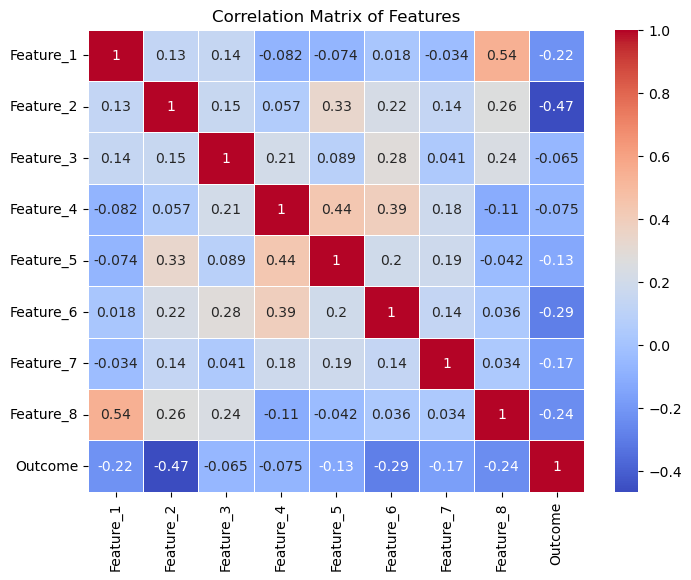

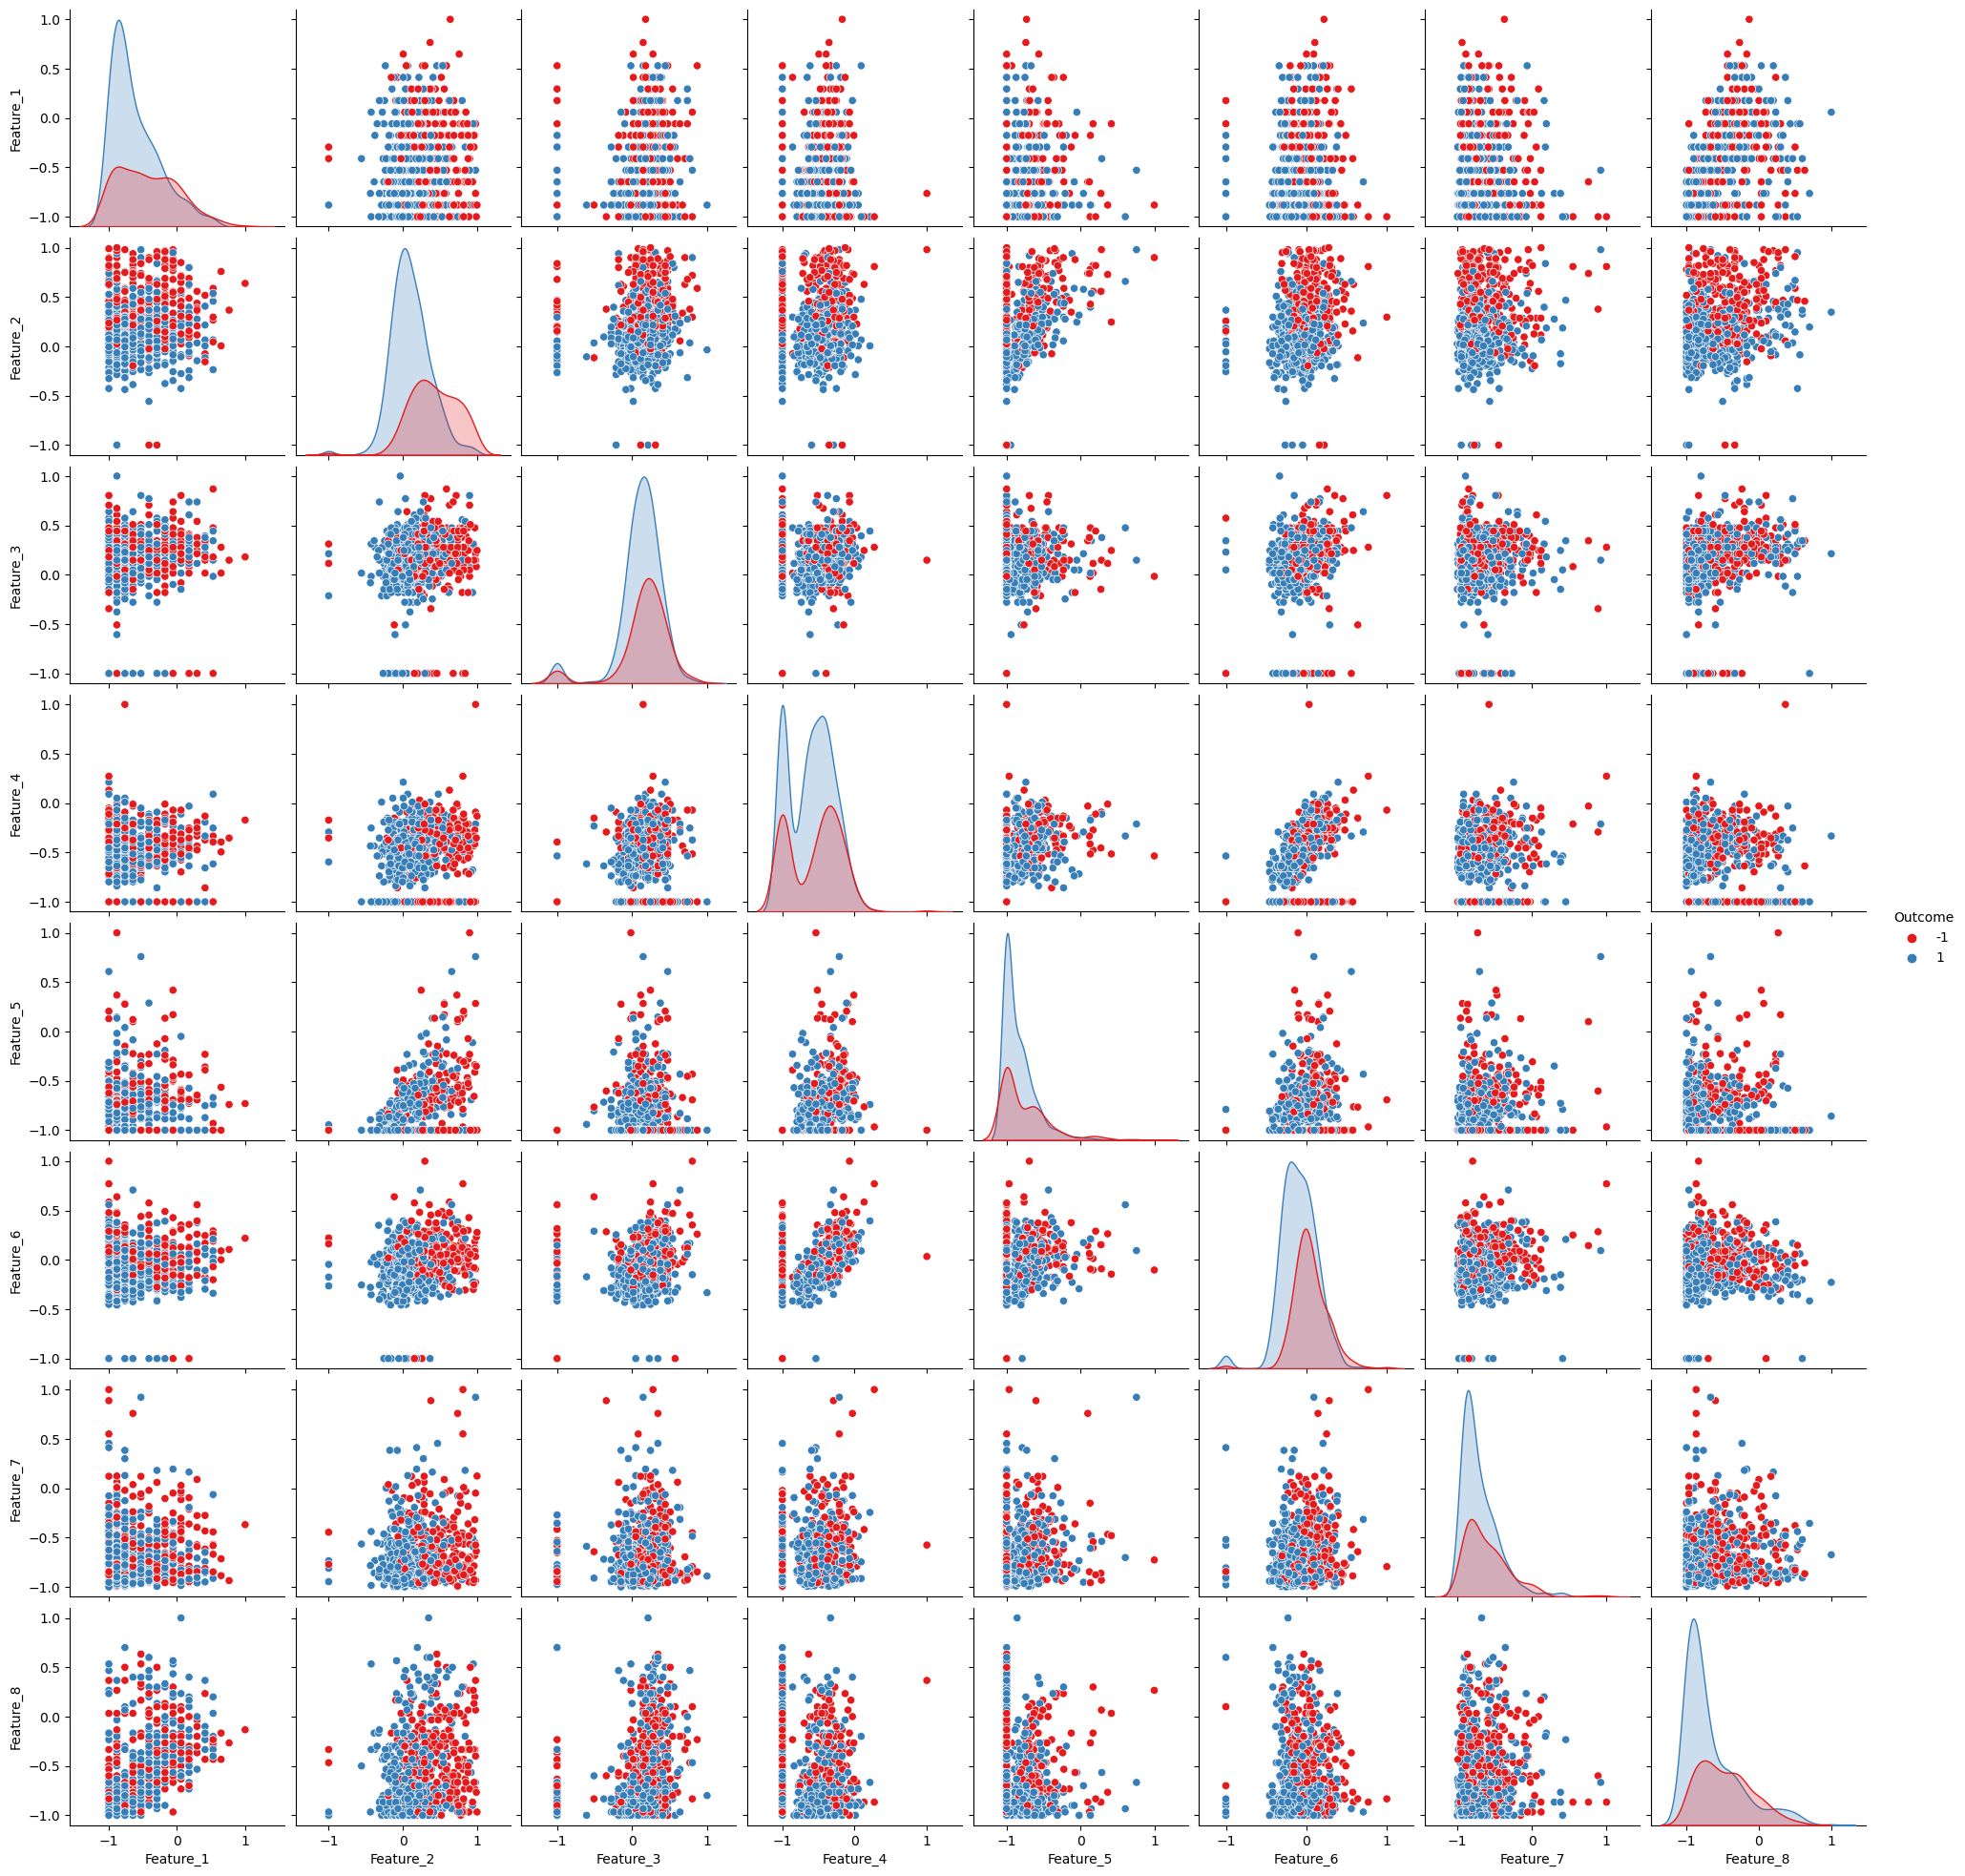

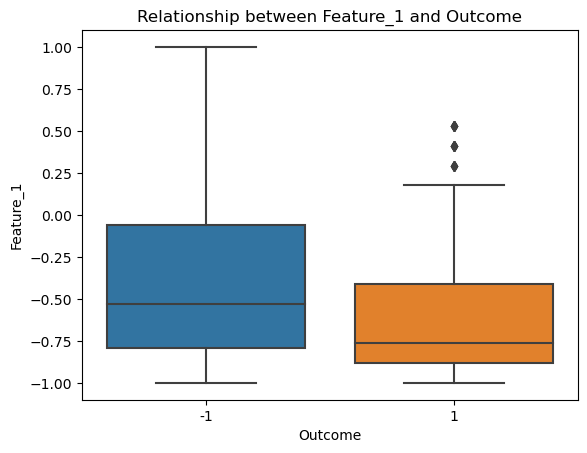

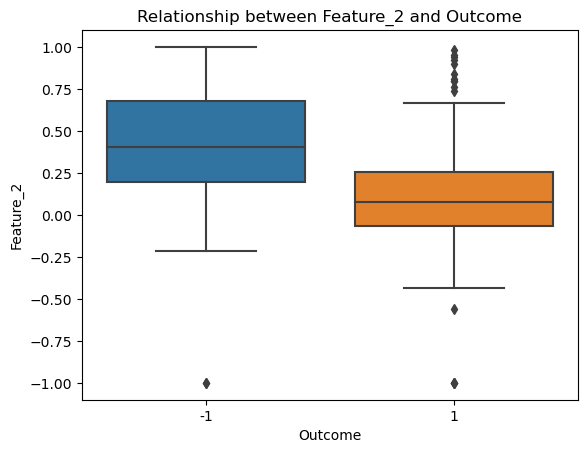

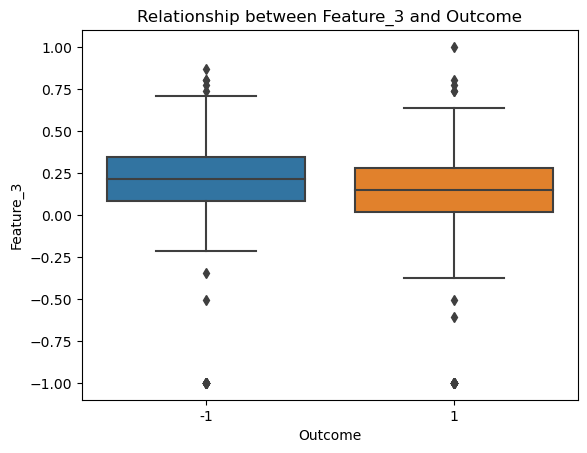

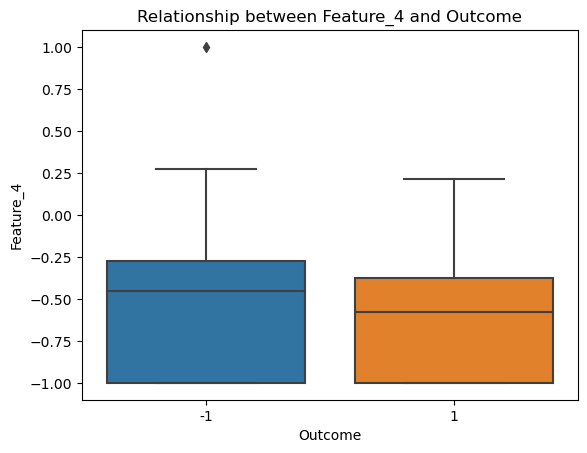

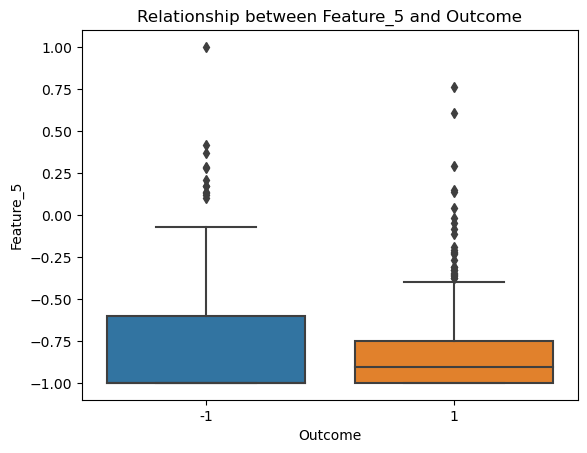

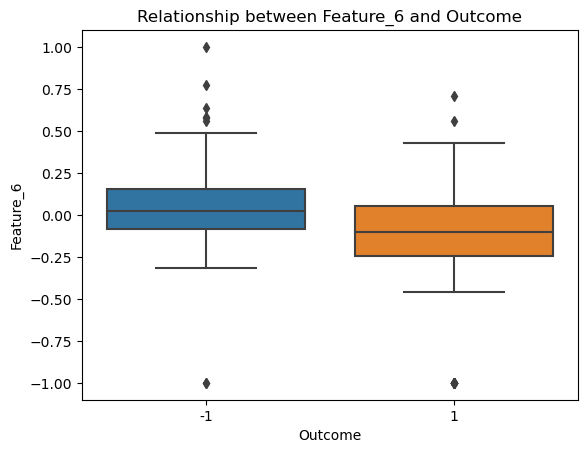

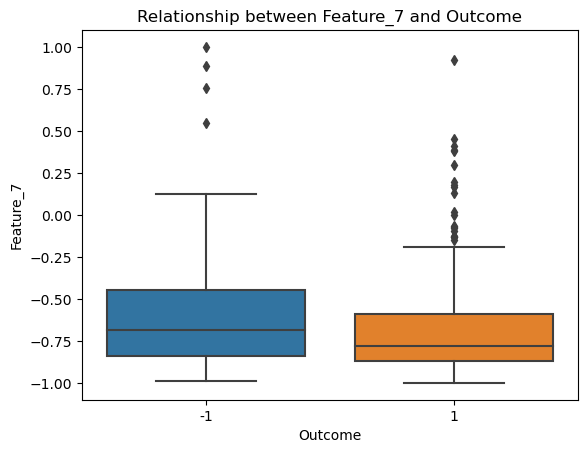

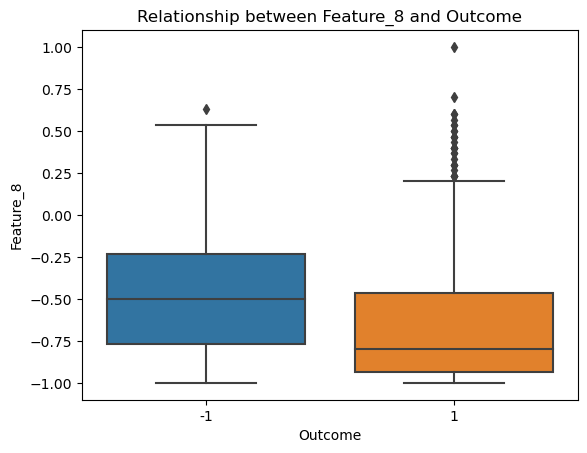

Initial Perceptron Model Evaluation Metrics:
{'Training Accuracy': 0.6499068901303539, 'Testing Accuracy': 0.6406926406926406, 'Precision': 0.9240506329113924, 'Recall': 0.4866666666666667, 'F1 Score': 0.6375545851528384}


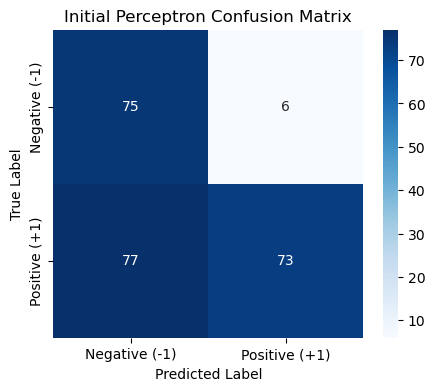


Starting grid search optimization for Perceptron...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Perceptron Parameters: {'alpha': 0.001, 'eta0': 0.01, 'max_iter': 1000, 'penalty': 'l1'}
Best F1 Score: 0.8052183398825526

Optimized Perceptron Model Evaluation Metrics:
{'Training Accuracy': 0.7094972067039106, 'Testing Accuracy': 0.7272727272727273, 'Precision': 0.7164179104477612, 'Recall': 0.96, 'F1 Score': 0.8205128205128206}


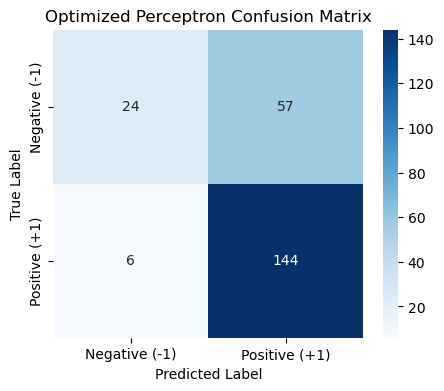


Comparison of Initial and Optimized Perceptron Models:
                      Training Accuracy  Testing Accuracy  Precision  \
Initial Perceptron             0.649907          0.640693   0.924051   
Optimized Perceptron           0.709497          0.727273   0.716418   

                        Recall  F1 Score  
Initial Perceptron    0.486667  0.637555  
Optimized Perceptron  0.960000  0.820513  


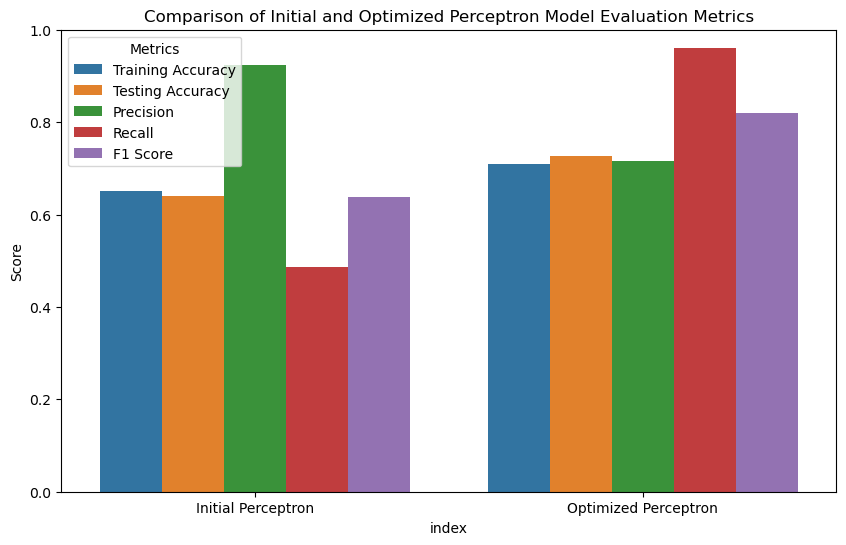

In [127]:
def main():
    # Load data
    file_path = 'diabetes_scale.txt'  
    X, y = load_data(file_path)

    print("\nAnalyzing feature relationships...")
    analyze_features(X, y)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Define the initial Perceptron model
    initial_perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

    # Train and evaluate the initial Perceptron model
    initial_results, y_pred_initial = evaluate_model(initial_perceptron, X_train, X_test, y_train, y_test)
    print("Initial Perceptron Model Evaluation Metrics:")
    print(initial_results)
    plot_confusion_matrix(y_test, y_pred_initial, "Initial Perceptron")

    # Perform grid search optimization for the Perceptron
    print("\nStarting grid search optimization for Perceptron...")
    optimized_perceptron, grid_result = optimize_perceptron(X_train, y_train)

    # Train and evaluate the optimized Perceptron model
    optimized_results, y_pred_optimized = evaluate_model(optimized_perceptron, X_train, X_test, y_train, y_test)
    print("\nOptimized Perceptron Model Evaluation Metrics:")
    print(optimized_results)
    plot_confusion_matrix(y_test, y_pred_optimized, "Optimized Perceptron")

    # Compare initial and optimized Perceptron models
    results_df = pd.DataFrame([initial_results, optimized_results], index=['Initial Perceptron', 'Optimized Perceptron'])
    print("\nComparison of Initial and Optimized Perceptron Models:")
    print(results_df)    

    # Plot comparison of evaluation metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    plt.figure(figsize=(10,6))
    sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
    plt.title('Comparison of Initial and Optimized Perceptron Model Evaluation Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Metrics')
    plt.show()

if __name__ == "__main__":
    main()

In [117]:

# Function to plot confusion matrix (same as before)
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (-1)', 'Positive (+1)'], yticklabels=['Negative (-1)', 'Positive (+1)'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Function to optimize the MLPClassifier using GridSearchCV
def optimize_mlp(X_train, y_train):
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (150, 100)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'adaptive'],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
    
    mlp = MLPClassifier(max_iter=3000, random_state=42)

    grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, 
                               cv=5, scoring='f1', n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)

    print("Best MLPClassifier Parameters:", grid_search.best_params_)
    print("Best F1 Score:", grid_search.best_score_)

    best_mlp = grid_search.best_estimator_

    return best_mlp, grid_search


Initial MLPClassifier Model Evaluation Metrics:
{'Training Accuracy': 0.8566108007448789, 'Testing Accuracy': 0.7532467532467533, 'Precision': 0.8206896551724138, 'Recall': 0.7933333333333333, 'F1 Score': 0.8067796610169492}


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


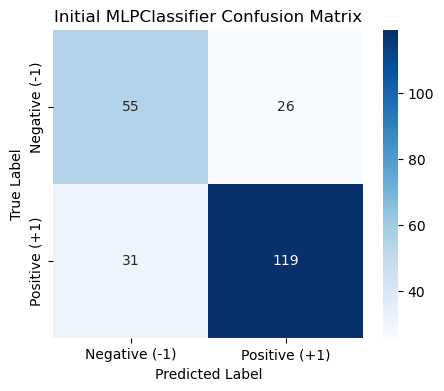


Starting grid search optimization for MLPClassifier...
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best MLPClassifier Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'adam'}
Best F1 Score: 0.843519876084096

Optimized MLPClassifier Model Evaluation Metrics:
{'Training Accuracy': 0.8938547486033519, 'Testing Accuracy': 0.7489177489177489, 'Precision': 0.7875, 'Recall': 0.84, 'F1 Score': 0.8129032258064516}


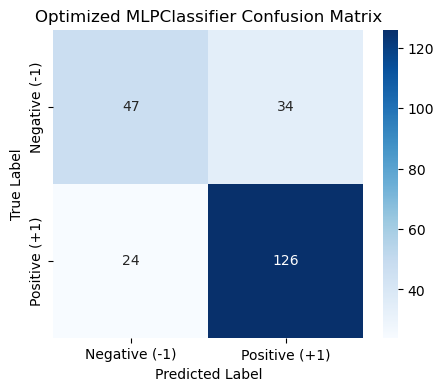


Comparison of Initial and Optimized MLPClassifier Models:
                         Training Accuracy  Testing Accuracy  Precision  \
Initial MLPClassifier             0.856611          0.753247    0.82069   
Optimized MLPClassifier           0.893855          0.748918    0.78750   

                           Recall  F1 Score  
Initial MLPClassifier    0.793333  0.806780  
Optimized MLPClassifier  0.840000  0.812903  


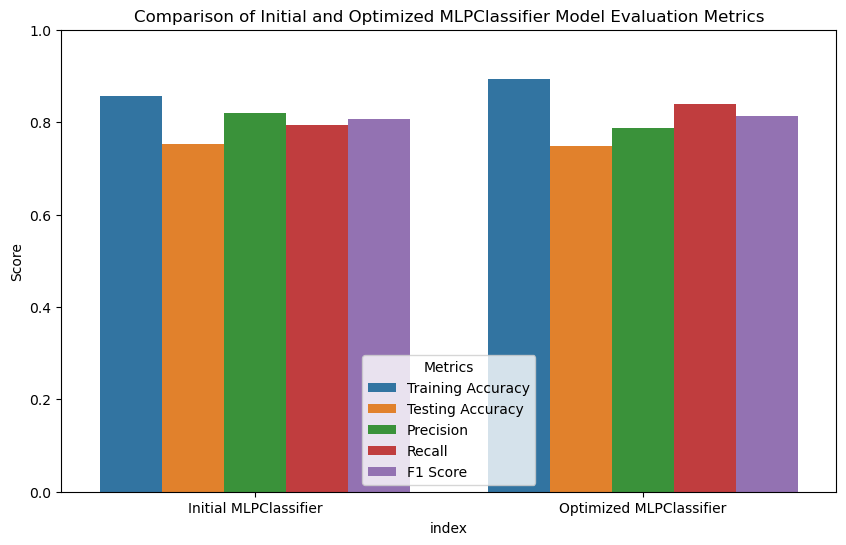

In [118]:
# Main function to execute the workflow
def main():
    # Load data
    file_path = 'diabetes_scale.txt'  # Path to the uploaded data file
    X, y = load_data(file_path)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Define and evaluate the initial MLPClassifier model
    initial_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

    # Train and evaluate the initial MLPClassifier model
    initial_results, y_pred_initial = evaluate_model(initial_mlp, X_train, X_test, y_train, y_test)
    print("Initial MLPClassifier Model Evaluation Metrics:")
    print(initial_results)
    plot_confusion_matrix(y_test, y_pred_initial, "Initial MLPClassifier")

    # Perform grid search optimization for the MLPClassifier
    print("\nStarting grid search optimization for MLPClassifier...")
    optimized_mlp, grid_result = optimize_mlp(X_train, y_train)

    # Train and evaluate the optimized MLPClassifier model
    optimized_results, y_pred_optimized = evaluate_model(optimized_mlp, X_train, X_test, y_train, y_test)
    print("\nOptimized MLPClassifier Model Evaluation Metrics:")
    print(optimized_results)
    plot_confusion_matrix(y_test, y_pred_optimized, "Optimized MLPClassifier")

    # Compare initial and optimized MLPClassifier models
    results_df = pd.DataFrame([initial_results, optimized_results], index=['Initial MLPClassifier', 'Optimized MLPClassifier'])
    print("\nComparison of Initial and Optimized MLPClassifier Models:")
    print(results_df)

    # Plot comparison of evaluation metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
    plt.title('Comparison of Initial and Optimized MLPClassifier Model Evaluation Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Metrics')
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()